In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error




In [2]:
# Load the data
data = pd.read_csv("C:/Users/User/Downloads/retail_sales_dataset.csv")
data.shape

(1000, 9)

In [3]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


<Axes: xlabel='Date'>

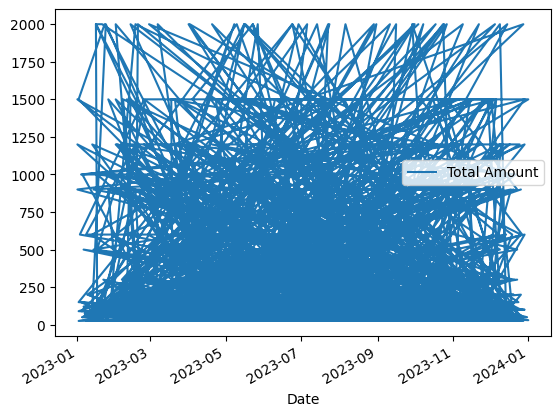

In [5]:
# convert object to date format
data['Date'] = pd.to_datetime(data['Date'])
# plot diagram
data.plot(x='Date', y='Total Amount')


In [6]:
data.drop(['Transaction ID','Customer ID','Gender','Age','Product Category','Quantity','Price per Unit'], axis=1, inplace=True) # drop columns
data = data.rename(columns={'Date': 'ds', 'Total Amount': 'y'}) # rename columns     

In [7]:
data.head()

,ds,y
0,2023-11-24,150
1,2023-02-27,1000
2,2023-01-13,30
3,2023-05-21,500
4,2023-05-06,100


In [8]:
# Initialize the model
model = Prophet()

# Fit the model
model.fit(data)

10:41:06 - cmdstanpy - INFO - Chain [1] start processing
10:41:07 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
# Create a dataframe to hold the dates for which we want to make predictions
future = model.make_future_dataframe(periods=365)

# Predict future sales
forecast = model.predict(future)
# display first 5 rows and 5 columns
forecast.head(5).iloc[:,0:6]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper
0,2023-01-01,450.290000,-296.706074,1139.355147,450.290000,450.290000
1,2023-01-02,450.310712,-195.399464,1206.136428,450.310712,450.310712
2,2023-01-03,450.331425,-275.811864,1172.699262,450.331425,450.331425
3,2023-01-04,450.352137,-261.971442,1162.340057,450.352137,450.352137
4,2023-01-05,450.372850,-233.519547,1172.480622,450.372850,450.372850


In [10]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
705,2024-12-27,466.289200,-216.344266,1173.500683,466.188134,466.395918,8.392948,8.392948,8.392948,8.392948,8.392948,8.392948,0.0,0.0,0.0,474.682148
706,2024-12-28,466.311352,-141.919578,1278.310725,466.209728,466.418378,70.272402,70.272402,70.272402,70.272402,70.272402,70.272402,0.0,0.0,0.0,536.583754
707,2024-12-29,466.333505,-291.429483,1149.237553,466.231302,466.440837,-30.433667,-30.433667,-30.433667,-30.433667,-30.433667,-30.433667,0.0,0.0,0.0,435.899838
708,2024-12-30,466.355657,-247.503671,1160.832218,466.252853,466.463398,26.089613,26.089613,26.089613,26.089613,26.089613,26.089613,0.0,0.0,0.0,492.445270
709,2024-12-31,466.377809,-275.279975,1158.351135,466.274416,466.485908,-24.096314,-24.096314,-24.096314,-24.096314,-24.096314,-24.096314,0.0,0.0,0.0,442.281495


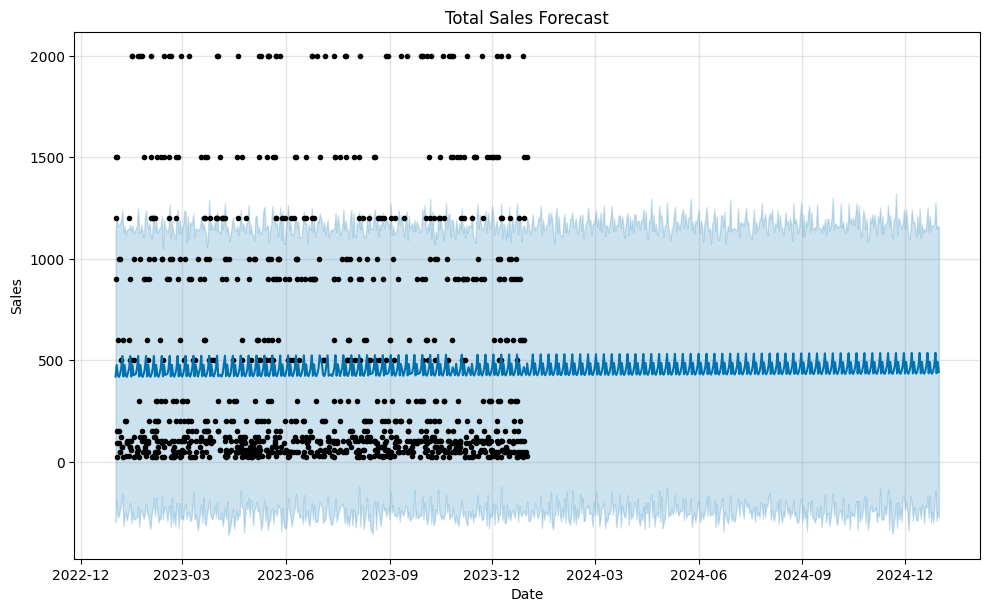

In [11]:
# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Total Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


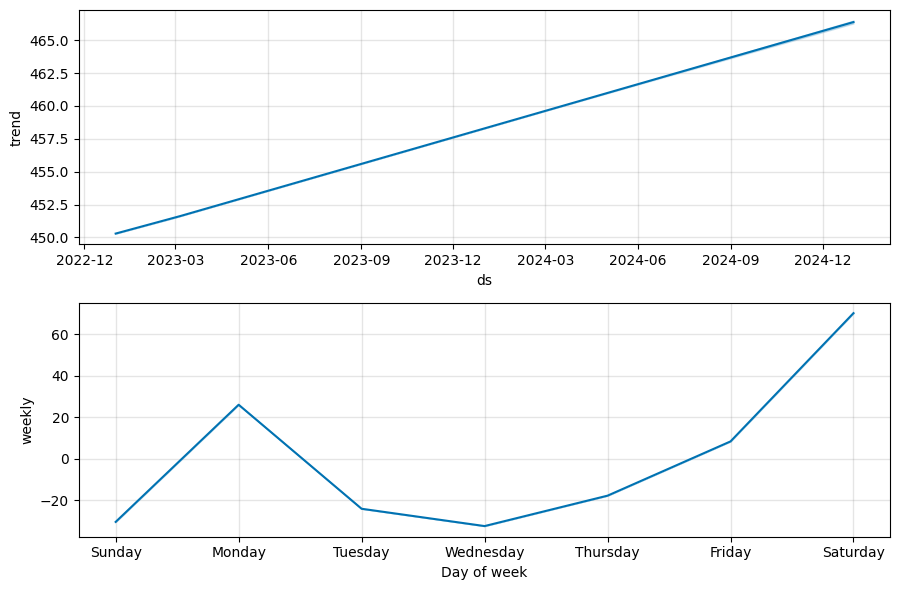

In [12]:
# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define the split point (90% train, 10% test)
split_index = int(len(data) * 0.9)

# Split the data
train = data.iloc[:split_index]
test = data.iloc[split_index:]

# Train the Prophet model
model = Prophet()
model.fit(train)

# Create a future dataframe for both train and test dates
future = data[['ds']]  # Ensuring all original dates are included
forecast = model.predict(future)

# Extract predictions only for the test period
forecast_test = forecast.iloc[split_index:split_index + len(test)]  # Now both lengths match

# Extract actual vs predicted values
y_true = test['y'].values
y_pred = forecast_test['yhat'].values  

# Ensure lengths match
print(f"Actual Values: {len(y_true)}, Predicted Values: {len(y_pred)}")  # Both should be 100

# Calculate performance metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")





10:41:30 - cmdstanpy - INFO - Chain [1] start processing
10:41:30 - cmdstanpy - INFO - Chain [1] done processing


Actual Values: 100, Predicted Values: 100
MAE: 423.10167242161833
RMSE: 493.86161011514355


In [14]:
import joblib

# Save the trained Prophet model
joblib.dump(model, 'prophet_model.pkl')
print("Model saved successfully as prophet_model.pkl")


Model saved successfully as prophet_model.pkl


In [15]:
import pandas as pd
import joblib

# Load the trained Prophet model
loaded_model = joblib.load('prophet_model.pkl')
print("Model loaded successfully!")

# Load your dataset (Make sure it has a 'ds' column with dates)
df = pd.read_csv("C:/Users/User/Downloads/retail_sales_dataset.csv")  # Replace with your actual dataset file
df['ds'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime format

# Prepare data for prediction
future = df[['ds']]  # Ensure only the 'ds' column is passed

# Make predictions
forecast = loaded_model.predict(future)

# Save the predictions
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("forecast_results.csv", index=False)
print("Predictions saved as forecast_results.csv")


Model loaded successfully!
Predictions saved as forecast_results.csv
